In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
import matplotlib as mpl
from scipy.fft import fft, fftfreq, ifft
import cmasher as cmr

spacing between wires on u plane (in beam direction) = 0.6 cm

## Event Display

In [2]:
new = uproot.open("nu_event/change_gain/waveform.root:wvfm/decon_wvfm/run_1_sub_17_evt_1_decon").to_numpy() # optimized 2d 

In [3]:
raw = uproot.open("nu_event/waveform.root:wvfm/raw_wvfm/run_1_sub_17_evt_1_raw").to_numpy()
sim = uproot.open("nu_event/waveform.root:wvfm/sim_wvfm/run_1_sub_17_evt_1_sim").to_numpy()
fed = uproot.open("nu_event/def/waveform.root:wvfm/decon_wvfm/run_1_sub_17_evt_1_decon").to_numpy() # default 2d 
opt = uproot.open("nu_event/opt/waveform.root:wvfm/decon_wvfm/run_1_sub_17_evt_1_decon").to_numpy() # optimized 2d 
one = uproot.open("nu_event/1d_decon/waveform.root:wvfm/decon_wvfm/run_1_sub_17_evt_1_decon").to_numpy() # 1d

In [4]:
idx_u0 = 0 
idx_v0 = 1984
idx_w0 = 3968
idx_u1 = 5632
idx_v1 = 7616
idx_w1 = 9000

### U Plane

In [5]:
ch_min = idx_w0
ch_max = idx_u1

mask = np.where((abs(np.ceil(sim[1]))[:-1]<ch_max) & (abs(np.ceil(sim[1]))[:-1] >= ch_min), True,False)
xbins = sim[1][(sim[1]<ch_max) & (sim[1] >= ch_min)]
ybins = sim[2]

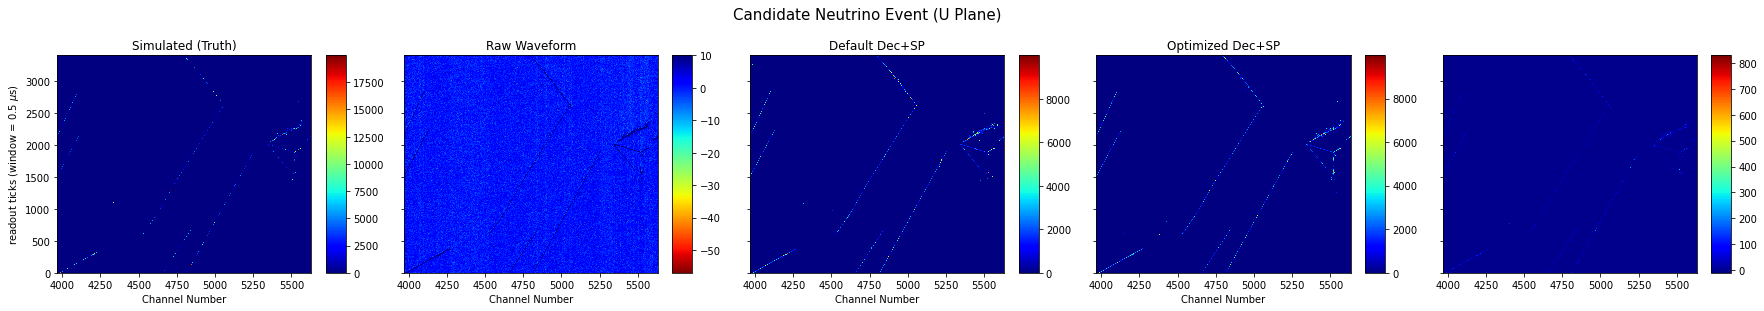

In [55]:
fig, axes = plt.subplots(1,5, figsize=(30,4),sharey=True,sharex=True)
hep.hist2dplot(H=sim[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[0],cmap="jet",cmin=-1e3,cmax=2e4,)

fix = raw[0][:][mask]
fix = np.where(fix>10,10,fix)
hep.hist2dplot(H=fix            ,xbins=xbins,ybins=ybins,shading="auto",ax=axes[1],cmap="jet_r",cmin=-80,cmax=10,)
hep.hist2dplot(H=fed[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[2],cmap="jet",cmin=-10,cmax=1e4,)
hep.hist2dplot(H=opt[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[3],cmap="jet",cmin=-10,cmax=1e4,)
hep.hist2dplot(H=one[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[4],cmap="jet",cmin=-10,cmax=1e4,)

axes[0].set_ylabel(r"readout ticks (window = 0.5 $\mu$s)")
axes[0].set_xlabel("Channel Number")
axes[1].set_xlabel("Channel Number")
axes[2].set_xlabel("Channel Number")
axes[3].set_xlabel("Channel Number")

axes[0].set_title("Simulated (Truth)")
axes[1].set_title("Raw Waveform")
axes[2].set_title("Default Dec+SP")
axes[3].set_title("Optimized Dec+SP")
# plt.xlim(1750,1950)
# plt.ylim(1500,2500)
plt.suptitle("Candidate Neutrino Event (U Plane)",y=1.05,fontsize=15)
plt.show()

/sbnd/app/users/lynnt/.venv/lib64/python3.6/site-packages/mplhep/plot.py:482: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(X, Y, H, **kwargs)


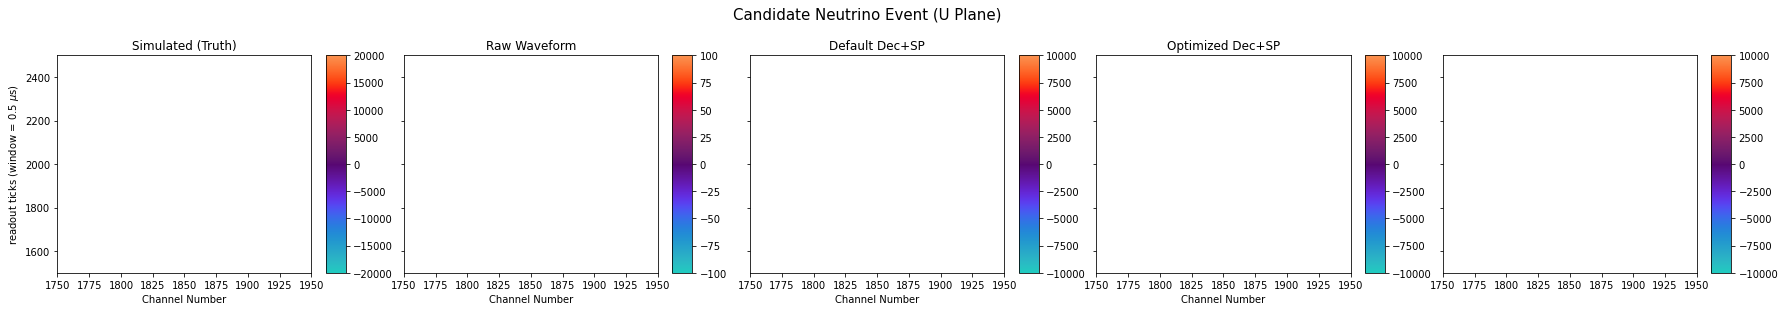

In [21]:
ch_min = idx_w0
ch_max = idx_

mask = np.where((abs(np.ceil(sim[1]))[:-1]<ch_max) & (abs(np.ceil(sim[1]))[:-1] >= ch_min), True,False)
xbins = sim[1][(sim[1]<ch_max) & (sim[1] >= ch_min)]
ybins = sim[2]

fig, axes = plt.subplots(1,5, figsize=(30,4),sharey=True,sharex=True)
hep.hist2dplot(H=sim[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[0],cmap=cmr.guppy_r,vmin=-2e4,vmax=2e4)
hep.hist2dplot(H=raw[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[1],cmap=cmr.guppy_r,vmin=-100,vmax=100,)
hep.hist2dplot(H=fed[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[2],cmap=cmr.guppy_r,vmin=-1e4,vmax=1e4)
hep.hist2dplot(H=opt[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[3],cmap=cmr.guppy_r,vmin=-1e4,vmax=1e4)
hep.hist2dplot(H=one[0][:][mask]/0.02,xbins=xbins,ybins=ybins,shading="auto",ax=axes[4],cmap=cmr.guppy_r,vmin=-1e4,vmax=1e4)

axes[0].set_ylabel(r"readout ticks (window = 0.5 $\mu$s)")
axes[0].set_xlabel("Channel Number")
axes[1].set_xlabel("Channel Number")
axes[2].set_xlabel("Channel Number")
axes[3].set_xlabel("Channel Number")

axes[0].set_title("Simulated (Truth)")
axes[1].set_title("Raw Waveform")
axes[2].set_title("Default Dec+SP")
axes[3].set_title("Optimized Dec+SP")
plt.xlim(1750,1950)
plt.ylim(1500,2500)
plt.suptitle("Candidate Neutrino Event (U Plane)",y=1.05,fontsize=15)
plt.show()

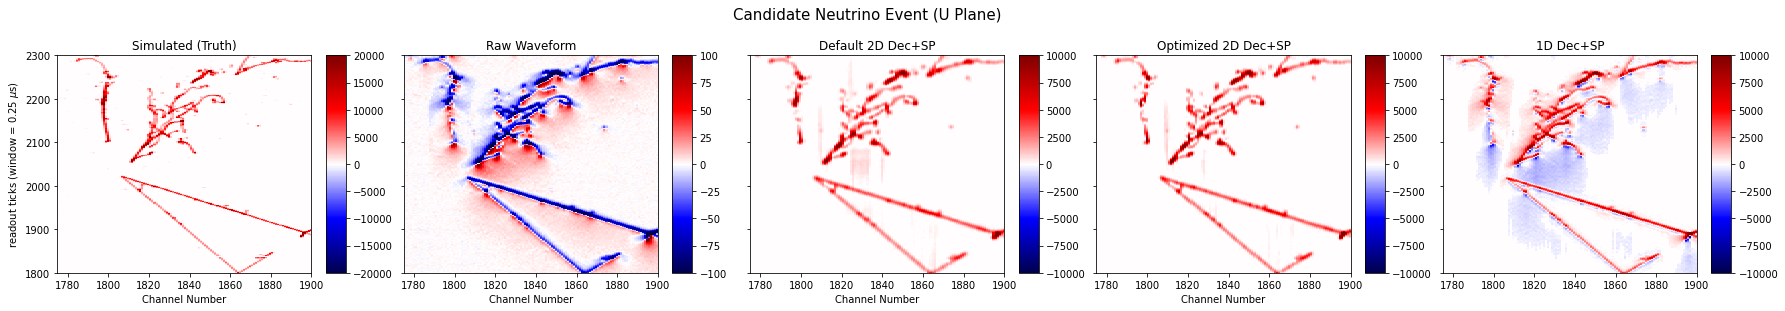

In [6]:
ch_min = 0
ch_max = idx_v0

mask = np.where((abs(np.ceil(sim[1]))[:-1]<ch_max) & (abs(np.ceil(sim[1]))[:-1] >= ch_min), True,False)
xbins = sim[1][(sim[1]<ch_max) & (sim[1] >= ch_min)]
ybins = sim[2]

fig, axes = plt.subplots(1,5, figsize=(30,4),sharey=True,sharex=True)
hep.hist2dplot(H=sim[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[0],cmap="seismic",vmin=-2e4,vmax=2e4)
hep.hist2dplot(H=raw[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[1],cmap="seismic",vmin=-100,vmax=100,)
hep.hist2dplot(H=fed[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[2],cmap="seismic",vmin=-1e4,vmax=1e4)
hep.hist2dplot(H=opt[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[3],cmap="seismic",vmin=-1e4,vmax=1e4)
hep.hist2dplot(H=one[0][:][mask]/0.02,xbins=xbins,ybins=ybins,shading="auto",ax=axes[4],cmap="seismic",vmin=-1e4,vmax=1e4)

axes[0].set_ylabel(r"readout ticks (window = 0.25 $\mu$s)")
axes[0].set_xlabel("Channel Number")
axes[1].set_xlabel("Channel Number")
axes[2].set_xlabel("Channel Number")
axes[3].set_xlabel("Channel Number")

axes[0].set_title("Simulated (Truth)")
axes[1].set_title("Raw Waveform")
axes[2].set_title("Default 2D Dec+SP")
axes[3].set_title("Optimized 2D Dec+SP")
axes[4].set_title("1D Dec+SP")

plt.xlim(1775,1900)
plt.ylim(1800,2300)
plt.suptitle("Candidate Neutrino Event (U Plane)",y=1.05,fontsize=15)
plt.show()

/sbnd/app/users/lynnt/.venv/lib64/python3.6/site-packages/mplhep/plot.py:482: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(X, Y, H, **kwargs)


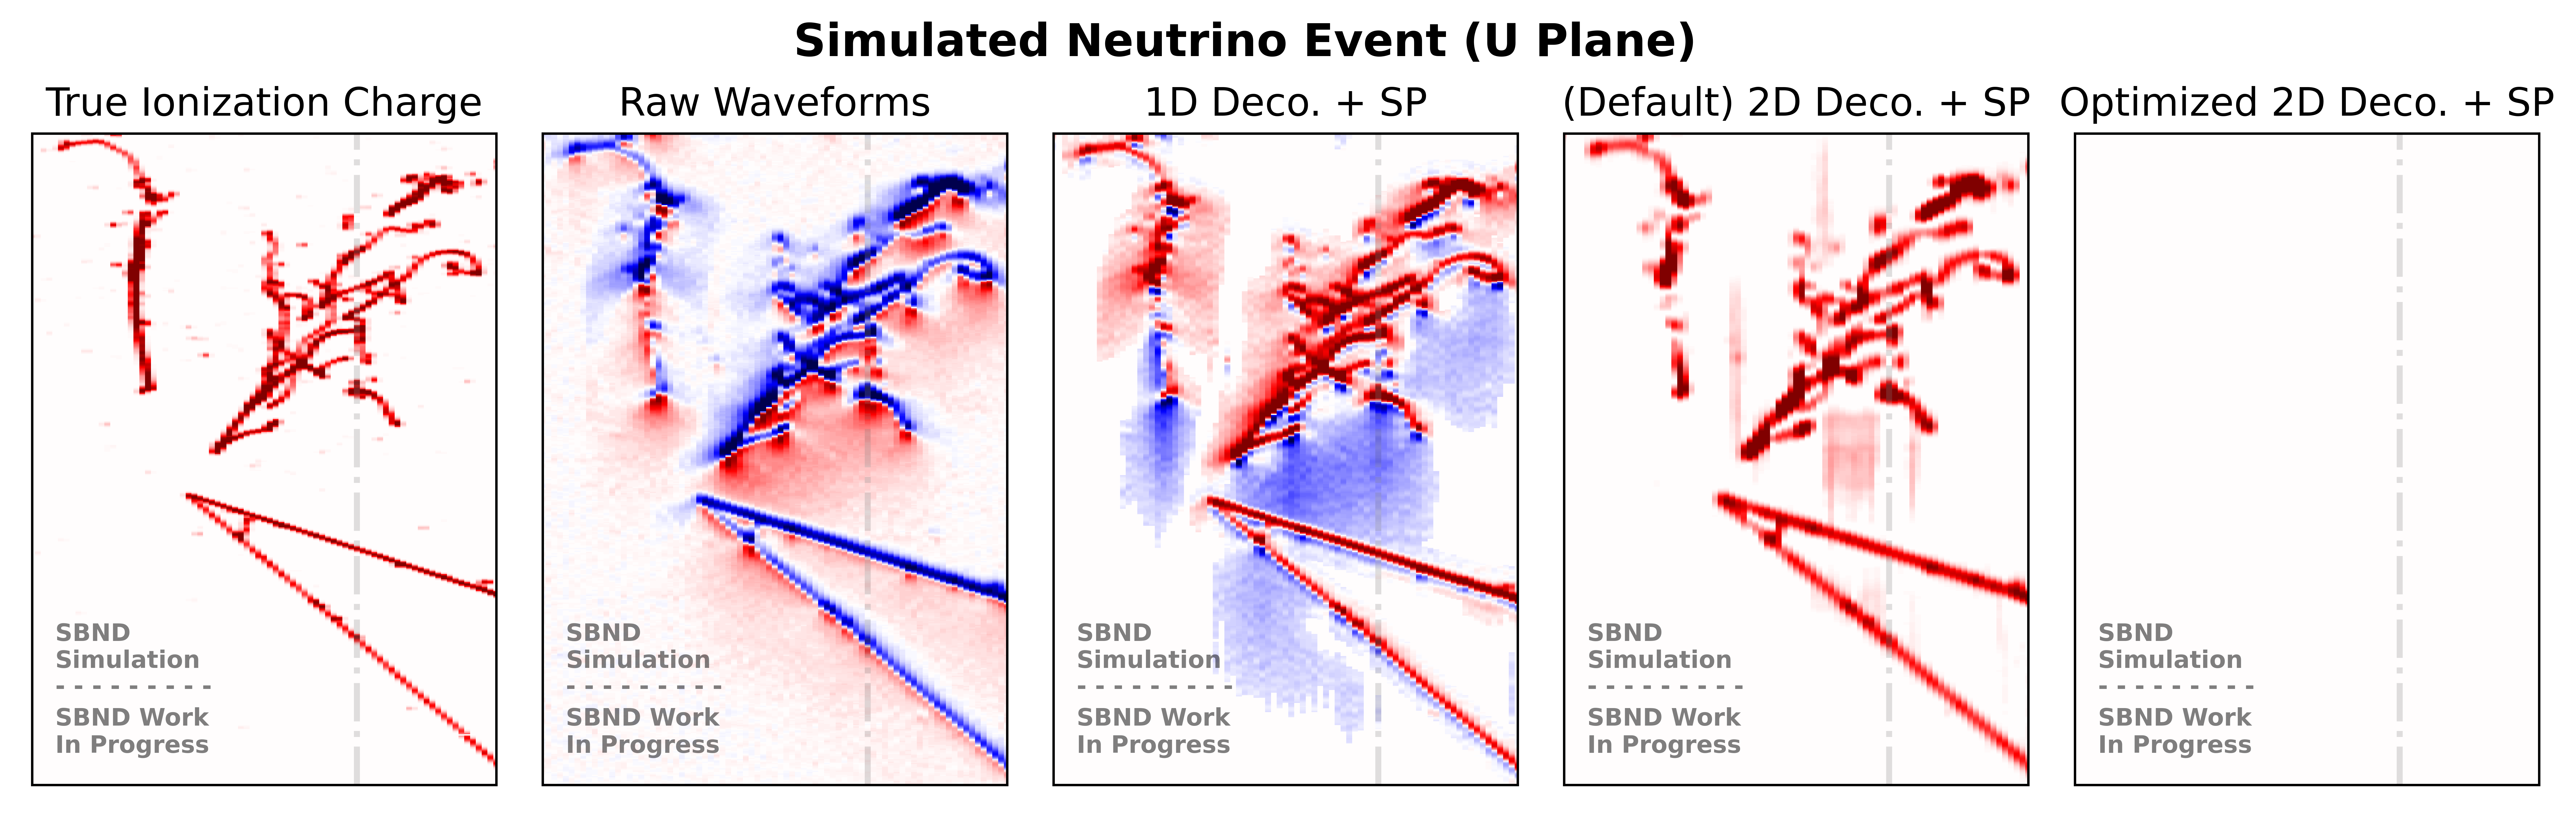

In [11]:
fig, axes = plt.subplots(1,5, figsize=(15,4),sharey=True,sharex=True,dpi=800)
plt.subplots_adjust(wspace=0.1)
hep.hist2dplot(H=sim[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[0],cmap="seismic",vmin=-1e4,vmax=1e4,cbar=False)
hep.hist2dplot(H=raw[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[1],cmap="seismic",vmin=-100,vmax=100,cbar=False)
hep.hist2dplot(H=one[0][:][mask]/0.02,xbins=xbins,ybins=ybins,shading="auto",ax=axes[2],cmap="seismic",vmin=-0.5e4,vmax=0.5e4,cbar=False)
hep.hist2dplot(H=fed[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[3],cmap="seismic",vmin=-0.5e4,vmax=0.5e4,cbar=False)
hep.hist2dplot(H=new[0][:][mask],     xbins=xbins,ybins=ybins,shading="auto",ax=axes[4],cmap="seismic",vmin=-0.5e4,vmax=0.5e4,cbar=False)
# plt.annotate(text="A.U.", xy = (0.925,0.85), xycoords='figure fraction')
axes[0].set_title("True Ionization Charge",fontsize=13)
axes[1].set_title("Raw Waveforms",fontsize=13)
axes[2].set_title("1D Deco. + SP",fontsize=13)
axes[3].set_title("(Default) 2D Deco. + SP",fontsize=13)
axes[4].set_title("Optimized 2D Deco. + SP",fontsize=13)

axes[0].set_xticks([])
axes[0].set_yticks([])

for ax in axes:
    ax.annotate(text="SBND \nSimulation",xy=(0.05,0.18),xycoords="axes fraction",fontweight="bold",fontsize=8,alpha=0.5)
    ax.annotate(text="- - - - - - - - -",xy=(0.05,0.14),xycoords="axes fraction",fontweight="bold",fontsize=8,alpha=0.5)
    ax.annotate(text="SBND Work\nIn Progress",xy=(0.05,0.05),xycoords="axes fraction",fontweight="bold",fontsize=8,alpha=0.5)
    ax.vlines(x=1836,ymin=1800,ymax=2300,color="gray",alpha=0.25,lw=2,linestyle="-.")

plt.xlim(1780,1860)
plt.ylim(1800,2300)
plt.suptitle("Simulated Neutrino Event (U Plane)",y=1.01,fontsize=15,fontweight="bold")
# plt.savefig("figures/event_display.png")
plt.show()

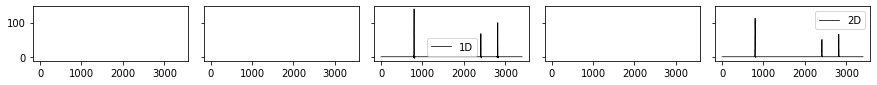

In [7]:
ch_num =5000
fig, axes = plt.subplots(1,5, figsize=(15,1),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.1)
# hep.histplot(sim[0][ch_num],ybins       ,lw=0.75,ax=axes[1],label="truth",alpha=0.25,color="black")
# hep.histplot(raw[0][ch_num]*50,ybins+2  ,lw=0.75,ax=axes[1],label="raw",color="black")
# hep.histplot(sim[0][ch_num],ybins       ,lw=0.75,ax=axes[2],label="truth",alpha=0.25,color="black")

hep.histplot(one[0][ch_num],ybins+2,lw=0.75,ax=axes[2],label="1D",color="black")
# hep.histplot(sim[0][ch_num],ybins       ,lw=0.75,ax=axes[3],label="truth", alpha=0.25,color="black")
# hep.histplot(opt[0][ch_num],ybins+2     ,lw=0.75,ax=axes[3],label="2D",color="black")
# hep.histplot(sim[0][ch_num],ybins       ,lw=0.75,ax=axes[4],label="truth", alpha=0.25,color="black")
hep.histplot(new[0][ch_num],ybins+2     ,lw=0.75,ax=axes[4],label="2D",color="black")

# axes[0].set_ylim(-1.0e4,3e4)
# axes[0].set_xticks([])
# axes[0].set_yticks([])
# plt.xlim(1800,2300)
axes[2].legend()
plt.legend()
plt.savefig("figures/event_display_wvfms.pdf")
plt.show()

1d integrated charge (w/ scaling):  2265.7466
2d integrated charge (w/ scaling):  2308.84
true charge (w/ scaling) 2329.6303125


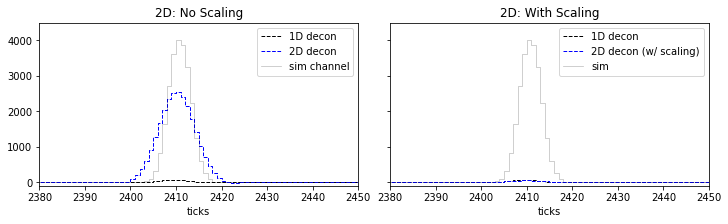

In [42]:
ch_num =5000

fig, axes = plt.subplots(1,2, figsize=(12,3),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.1)
hep.histplot(one[0][ch_num]   ,ybins+2,lw=1,ax=axes[0],linestyle="--",label="1D decon",color="black")
hep.histplot(new[0][ch_num]*50,ybins+2,lw=1,ax=axes[0],linestyle="--",label="2D decon",color="blue" )
hep.histplot(sim[0][ch_num],ybins,lw=0.75,ax=axes[0],label="sim channel", alpha=0.25,color="black")


hep.histplot(one[0][ch_num],ybins+2,lw=1, ax=axes[1],linestyle="--",label="1D decon",color="black")
hep.histplot(new[0][ch_num],ybins+2,lw=1, ax=axes[1],linestyle="--",label="2D decon (w/ scaling)",color="blue" )
hep.histplot(sim[0][ch_num],ybins,lw=0.75,ax=axes[1],label="sim", alpha=0.25,color="black")

print("1d integrated charge (w/ scaling): ", np.sum(one[0][ch_num]))
print("2d integrated charge (w/ scaling): ", np.sum(new[0][ch_num]))
print("true charge (w/ scaling)", np.sum(sim[0][ch_num])*0.02)
# axes[0].set_ylim(-1.0e4,3e4)
# axes[0].set_xticks([])
# axes[0].set_yticks([])
plt.xlim(2380,2450)
plt.ylim(-100,4500)
axes[0].set_xlabel("ticks")
axes[1].set_xlabel("ticks")
axes[0].set_title("2D: No Scaling")
axes[1].set_title("2D: With Scaling")
axes[0].legend()
plt.legend()
plt.savefig("figures/event_display_wvfms.pdf")
plt.show()

### V Plane

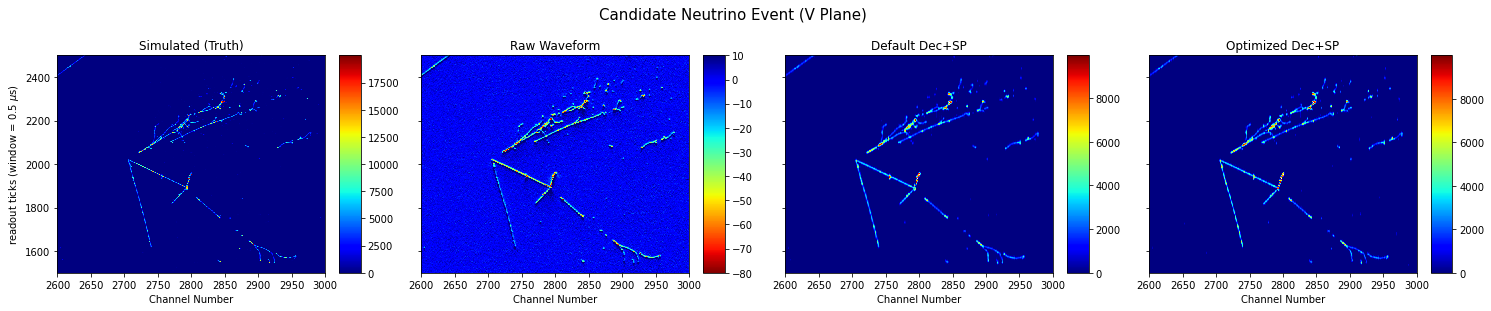

In [44]:
ch_min = idx_v0
ch_max = idx_w0

mask = np.where((abs(np.ceil(sim[1]))[:-1]<ch_max) & (abs(np.ceil(sim[1]))[:-1] >= ch_min), True,False)
xbins = sim[1][(sim[1]<ch_max) & (sim[1] >= ch_min)]
ybins = sim[2]

fig, axes = plt.subplots(1,4, figsize=(25,4),sharey=True,sharex=True)
hep.hist2dplot(H=sim[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[0],cmap="jet",cmin=-1e3,cmax=2e4,)

fix = raw[0][:][mask]
# fix = np.where(fix>10,10,fix)
hep.hist2dplot(H=fix            ,xbins=xbins,ybins=ybins,shading="auto",ax=axes[1],cmap="jet_r",cmin=-80,cmax=10,)
hep.hist2dplot(H=fed[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[2],cmap="jet",cmin=-10,cmax=1e4,)
hep.hist2dplot(H=opt[0][:][mask],xbins=xbins,ybins=ybins,shading="auto",ax=axes[3],cmap="jet",cmin=-10,cmax=1e4,)

axes[0].set_ylabel(r"readout ticks (window = 0.5 $\mu$s)")
axes[0].set_xlabel("Channel Number")
axes[1].set_xlabel("Channel Number")
axes[2].set_xlabel("Channel Number")
axes[3].set_xlabel("Channel Number")

axes[0].set_title("Simulated (Truth)")
axes[1].set_title("Raw Waveform")
axes[2].set_title("Default Dec+SP")
axes[3].set_title("Optimized Dec+SP")
plt.xlim(2600,3000)
plt.ylim(1500,2500)
plt.suptitle("Candidate Neutrino Event (V Plane)",y=1.05,fontsize=15)
plt.show()

## Waveform Display

In [46]:
#th2f: y-axis is ticks, x-axis is ch number? 

# first array is the height of the wvfm (adc value)
# second array is ch number
# third array is time ticks

In [170]:
file = uproot.open("nu_event/opt/sbnd-data-check.root")
# file.keys()

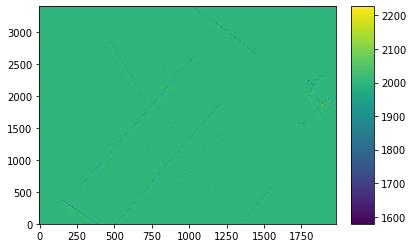

In [221]:
hep.hist2dplot(file["hu_orig0"].to_numpy())
# plt.xlim(2700,2750)
ymin, ymax = plt.ylim()
# plt.ylim(800,1200)
plt.show()

In [355]:
ch_num = 1838
xmin = 1500
xmax = 2300
plane = "u"
title = plane+" Plane"

In [360]:
# wiener definitions
if plane == "u":
    wiener_power = 5.5 
    wiener_sigma = 0.15
if plane == "v":
    wiener_power = 5.0 
    wiener_sigma = 0.15
if plane == "w":
    wiener_power = 3.0
    wiener_sigma = 0.25
    
def wiener_filter(f,a,b):
    return np.where(f!=0, np.exp(-0.5*(abs(f)/a)**b),0)

gaus_sigma = 0.1 
def gaussian_filter(f,a):
    return np.where(f!=0, np.exp(-0.5*(abs(f)/a)**2),0)

# 0.0185
def lf_filter(f,a):
    return 1-np.exp(-1*(abs(f)/a)**2)

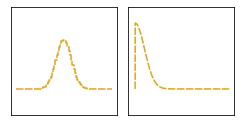

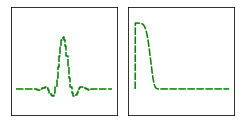

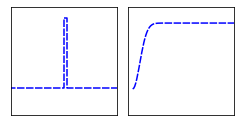

In [365]:
time_dom = np.linspace(-20,20,80)
freq_dom = np.linspace(0,1.0,1000)
time_bins = np.linspace(-20,20,81)


# gaus
fig, axes = plt.subplots(1,2,figsize=(4,2))
plt.subplots_adjust(wspace=0.1)
hep.histplot((1/(1/(0.12*np.pi)*np.sqrt(2*np.pi)))*gaussian_filter(time_dom,1/(0.1*np.pi)),time_bins,ax=axes[0],
             lw=1.5,color="goldenrod",linestyle=(0,(5,1)))
axes[1].plot(freq_dom,gaussian_filter(freq_dom,0.1),
             lw=1.5,color="goldenrod",linestyle=(0,(5,1)))
axes[0].set_ylim(-0.08,0.25)
axes[1].set_ylim(-0.4,1.25)
axes[1].set_xlim(-0.08,1.05)

axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].set_xticks([]); axes[1].set_yticks([])
plt.savefig("figures/filter_gaus.pdf")
plt.show()

# wiener 
fig, axes = plt.subplots(1,2,figsize=(4,2))
plt.subplots_adjust(wspace=0.1)
x_u = np.zeros(2000)
x_u[0:len(x_u)//2] =            wiener_filter(freq_dom,wiener_sigma,wiener_power)
x_u[len(x_u)//2 + 1:] = np.flip(wiener_filter(freq_dom,wiener_sigma,wiener_power)[1:])
s_u = ifft(x_u)
axes[0].step(np.linspace(0,21,40),s_u.real[:40],where="post",
             lw=1.5,color="green",linestyle=(0,(5,1)))
axes[0].step(np.linspace(-20,0,40),np.flip(s_u.real[:40]),where="post",
             lw=1.5,color="green",linestyle=(0,(5,1)))
axes[1].plot(freq_dom,wiener_filter(freq_dom,wiener_sigma,wiener_power),
             lw=1.5,color="green",linestyle=(0,(5,1)))
axes[0].set_ylim(-0.08,0.25)
axes[1].set_ylim(-0.4,1.25)
axes[1].set_xlim(-0.08,1.05)

axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].set_xticks([]); axes[1].set_yticks([])
plt.savefig("figures/filter_wiener.pdf")
plt.show()

# lf 
fig, axes = plt.subplots(1,2,figsize=(4,2))
plt.subplots_adjust(wspace=0.1)
x_u = np.zeros(2000)
x_u[0:len(x_u)//2] =            lf_filter(freq_dom,0.01)
x_u[len(x_u)//2 + 1:] = np.flip(lf_filter(freq_dom,0.01)[1:])
s_u = ifft(x_u)
axes[0].step(np.linspace(0,21,40),s_u.real[:40],where="post",
             lw=1.5,color="blue",linestyle=(0,(5,1)))
axes[0].step(np.linspace(-20,0,40),np.flip(s_u.real[:40]),where="post",
             lw=1.5,color="blue",linestyle=(0,(5,1)))
axes[1].plot(freq_dom,abs(lf_filter(freq_dom,0.01)),
             lw=1.5,color="blue",linestyle=(0,(5,1)))

axes[0].set_ylim(-0.4,1.15)
axes[0].set_xlim(-10,10)
axes[1].set_xlim(-0.005,0.1)
axes[1].set_ylim(-0.4,1.25)

axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].set_xticks([]); axes[1].set_yticks([])
plt.savefig("figures/filter_lf.pdf")
plt.show()


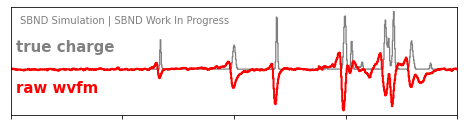

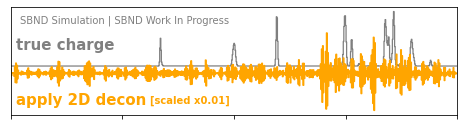

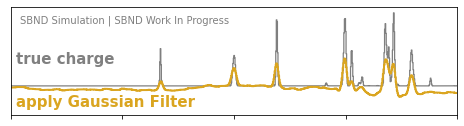

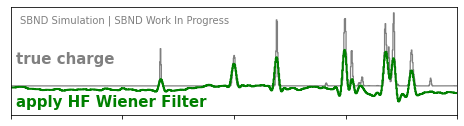

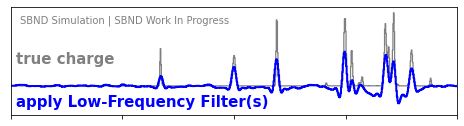

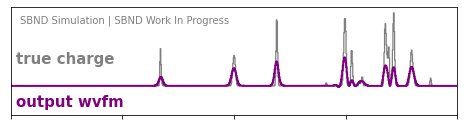

In [364]:
plt.figure(figsize=(8,2))
plt.xlim(xmin,xmax)

hep.histplot(sim[0][ch_num],ybins      ,label="truth",color="black",alpha=0.5,lw=1.25)
raw_mask = np.where(np.ceil(file["h"+plane+"_raw0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_raw0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_raw0"]    .to_numpy()[0][raw_mask]*75,tk,lw=2,color="red")
plt.yticks([])
ymin, ymax = plt.ylim()
plt.xticks(ticks=np.linspace(xmin,xmax,5),labels=[])
plt.annotate(text="true charge",xy=(xmin+10,3e3),color="gray",fontsize=15,fontweight="bold")
plt.annotate(text="raw wvfm",xy=(xmin+10,-4e3),color="red",fontsize=15,fontweight="bold")
plt.annotate(text="SBND Simulation | SBND Work In Progress",xy=(0.02,0.85),xycoords="axes fraction",alpha=0.5)
plt.savefig("figures/wvfm_raw.pdf")
plt.show()

plt.figure(figsize=(8,2))
plt.xlim(xmin,xmax)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",color="black",alpha=0.5,lw=1.25)
dec_mask = np.where(np.ceil(file["h"+plane+"_decon_2D_init0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_decon_2D_init0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_decon_2D_init0"] .to_numpy()[0][dec_mask]/1e2,tk,color="orange")
plt.yticks([])
plt.xticks(ticks=np.linspace(xmin,xmax,5),labels=[])
plt.annotate(text="true charge",xy=(xmin+10,3e3),color="gray",fontsize=15,fontweight="bold")
plt.annotate(text="apply 2D decon",xy=(xmin+10,-7e3),color="orange",fontsize=15,fontweight="bold")
plt.annotate(text="[scaled x0.01]", xy=(xmin+250,-6.8e3),color="orange",fontsize=10,fontweight="bold")
plt.annotate(text="SBND Simulation | SBND Work In Progress",xy=(0.02,0.85),xycoords="axes fraction",alpha=0.5)
plt.savefig("figures/wvfm_decon.pdf")
plt.show()

plt.figure(figsize=(8,2))
plt.xlim(xmin,xmax)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",color="black",alpha=0.5,lw=1.25)
hep.histplot(ifft(gaussian_filter(xf,gaus_sigma)*yf).real,tk+1,lw=2,color="goldenrod")
plt.ylim(-4000,ymax)
plt.yticks([])
plt.xticks(ticks=np.linspace(xmin,xmax,5),labels=[])
plt.annotate(text="true charge",xy=(xmin+10,3e3),color="gray",fontsize=15,fontweight="bold")
plt.annotate(text="apply Gaussian Filter",xy=(xmin+10,-2.75e3),color="goldenrod",fontsize=15,fontweight="bold")
plt.annotate(text="SBND Simulation | SBND Work In Progress",xy=(0.02,0.85),xycoords="axes fraction",alpha=0.5)
plt.savefig("figures/wvfm_gauss.pdf")

plt.figure(figsize=(8,2))
plt.xlim(xmin,xmax)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",color="black",alpha=0.5,lw=1.25)
adc = file["h"+plane+"_decon_2D_init0"] .to_numpy()[0][dec_mask]
xf = fftfreq(adc.size,0.5)
yf = fft(adc)
hep.histplot(ifft(wiener_filter(xf,wiener_sigma,wiener_power)*yf).real,tk+1,lw=2,color="green")
plt.ylim(-4000,ymax)
plt.yticks([])
plt.xticks(ticks=np.linspace(xmin,xmax,5),labels=[])
plt.annotate(text="true charge",xy=(xmin+10,3e3),color="gray",fontsize=15,fontweight="bold")
plt.annotate(text="apply HF Wiener Filter",xy=(xmin+10,-2.75e3),color="green",fontsize=15,fontweight="bold")
plt.annotate(text="SBND Simulation | SBND Work In Progress",xy=(0.02,0.85),xycoords="axes fraction",alpha=0.5)
plt.savefig("figures/wvfm_wiener.pdf")
plt.show()

plt.figure(figsize=(8,2))
plt.xlim(xmin,xmax)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",color="black",alpha=0.5,lw=1.25)
roi_mask = np.where(np.ceil(file["h"+plane+"_tight_lf0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_tight_lf0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_tight_lf0"].to_numpy()[0][roi_mask],tk+1,lw=2,color="blue")
plt.ylim(-4000,ymax)
plt.yticks([])
plt.xticks(ticks=np.linspace(xmin,xmax,5),labels=[])
plt.annotate(text="true charge",xy=(xmin+10,3e3),color="gray",fontsize=15,fontweight="bold")
plt.annotate(text="apply Low-Frequency Filter(s)",xy=(xmin+10,-2.75e3),color="blue",fontsize=15,fontweight="bold")
plt.annotate(text="SBND Simulation | SBND Work In Progress",xy=(0.02,0.85),xycoords="axes fraction",alpha=0.5)
plt.savefig("figures/wvfm_lf.pdf")
plt.show()


plt.figure(figsize=(8,2))
plt.xlim(xmin,xmax)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",color="black",alpha=0.5,lw=1.25)
roi_mask = np.where(np.ceil(file["h"+plane+"_gauss0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_gauss0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_gauss0"].to_numpy()[0][roi_mask],tk+1,lw=2,color="purple")
plt.ylim(-4000,ymax)
plt.yticks([])
plt.xticks(ticks=np.linspace(xmin,xmax,5),labels=[])
plt.annotate(text="true charge",xy=(xmin+10,3e3),color="gray",fontsize=15,fontweight="bold")
plt.annotate(text="output wvfm",xy=(xmin+10,-2.75e3),color="purple",fontsize=15,fontweight="bold")
plt.annotate(text="SBND Simulation | SBND Work In Progress",xy=(0.02,0.85),xycoords="axes fraction",alpha=0.5)
plt.savefig("figures/wvfm_output.pdf")
# plt.annotate(text="SBND Work In Progress",xy=(0.80,0.05),xycoords="axes fraction",alpha=0.5)
plt.show()

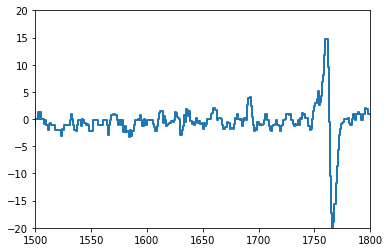

In [220]:
raw_mask = np.where(np.ceil(file["h"+plane+"_raw0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_raw0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_raw0"]    .to_numpy()[0][raw_mask],tk,lw=2)
plt.xlim(1500,1800)
plt.ylim(-20,20)
plt.show()

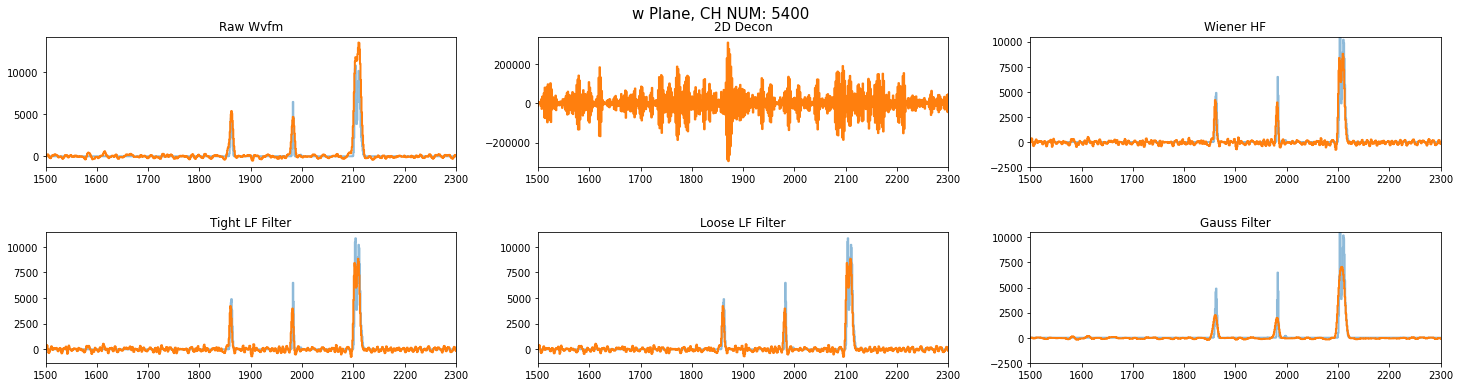

In [210]:
fig, axes = plt.subplots(2,3,figsize=(25,6),sharex=True)
plt.subplots_adjust(hspace=0.5)

hep.histplot(sim[0][ch_num],ybins      ,label="truth",ax=axes[0][0],alpha=0.5,lw=2)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",ax=axes[0][1],alpha=0.5,lw=2)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",ax=axes[0][2],alpha=0.5,lw=2)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",ax=axes[1][1],alpha=0.5,lw=2)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",ax=axes[1][0],alpha=0.5,lw=2)
hep.histplot(sim[0][ch_num],ybins      ,label="truth",ax=axes[1][2],alpha=0.5,lw=2)

# raw 
raw_mask = np.where(np.ceil(file["h"+plane+"_raw0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_raw0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_raw0"]    .to_numpy()[0][raw_mask]*75,tk,ax=axes[0][0],lw=2)
axes[0][0].set_title("Raw Wvfm")
axes[0][0].set_xlim(xmin,xmax)
axes[0][0].xaxis.set_tick_params(which='both', labelbottom=True)

# dec
dec_mask = np.where(np.ceil(file["h"+plane+"_decon_2D_init0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_decon_2D_init0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_decon_2D_init0"] .to_numpy()[0][dec_mask],tk,ax=axes[0][1],lw=2)
axes[0][1].set_title("2D Decon")
axes[0][1].xaxis.set_tick_params(which='both', labelbottom=True)

# wiener hf
adc = file["h"+plane+"_decon_2D_init0"] .to_numpy()[0][dec_mask]
xf = fftfreq(adc.size,0.5)
yf = fft(adc)
hep.histplot(ifft(wiener_filter(xf,wiener_sigma,wiener_power)*yf).real,tk,ax=axes[0][2],lw=2)
axes[0][2].set_ylim(-2500,1.05e4)
axes[0][2].set_title("Wiener HF")
axes[0][2].xaxis.set_tick_params(which='both', labelbottom=True)

# roi filters
roi_mask = np.where(np.ceil(file["h"+plane+"_tight_lf0"].to_numpy()[1])==ch_num)[0][0]
tk = file["h"+plane+"_tight_lf0"].to_numpy()[2]
hep.histplot(file["h"+plane+"_tight_lf0"].to_numpy()[0][roi_mask],tk,ax=axes[1][0],lw=2)
hep.histplot(file["h"+plane+"_loose_lf0"].to_numpy()[0][roi_mask],tk,ax=axes[1][1],lw=2)
axes[1][0].set_title("Tight LF Filter")
axes[1][1].set_title("Loose LF Filter")

# gaus
tk = file["h"+plane+"_decon_2D_init0"].to_numpy()[2]
hep.histplot(ifft(gaussian_filter(xf,gaus_sigma)*wiener_filter(xf,wiener_sigma,wiener_power)*yf).real,tk,ax=axes[1][2],lw=2)
axes[1][2].set_title("Gauss Filter")
axes[1][2].xaxis.set_tick_params(which='both', labelbottom=True)
axes[1][2].set_ylim(-2500,1.05e4)


plt.suptitle(title+f", CH NUM: {ch_num}",y=0.95,fontsize=15)
# plt.title(f"CH NUM: {int(ch)}")
plt.show()

In [252]:
adc = file["hu_decon_2D_init0"] .to_numpy()[0][dec_mask]
# in us 
us = tk*2

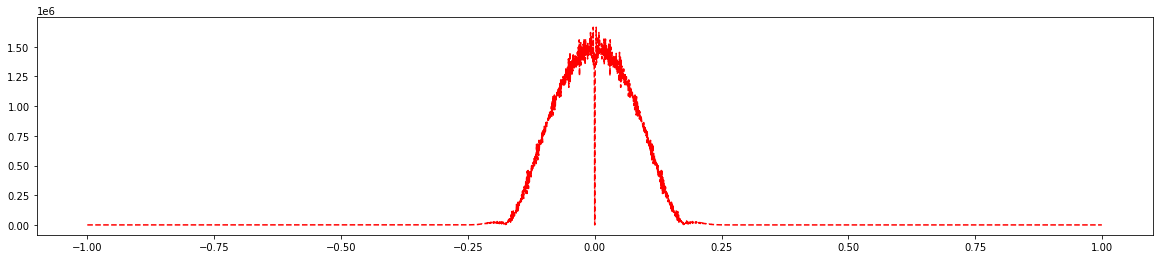

In [513]:
plt.figure(figsize=(20,4))
yf = fft(adc)
xf = fftfreq(adc.size,0.5)
# plt.plot(np.fft.fftshift(xf),np.fft.fftshift(np.abs(yf)))
plt.plot(np.fft.fftshift(xf),np.fft.fftshift(np.abs(wiener_filter(xf,0.15,5)*yf)),'--',label="Plane 0 (U)",color="red")
# plt.ylim(0,0.5e8)
# plt.xlim(-0.002,0.002)
plt.show()

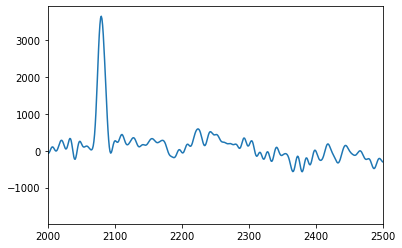

In [ ]:
plt.plot(tk[10:-11],ifft(wiener_filter(xf,0.15,5)*yf).real[10:-10])
plt.xlim(2000,2500)
plt.show()

optimization plots ;()

In [346]:
bias_u = [0.003974895397489464, 0.006485355648535529, 0.008158995815899572, 0.006485355648535529, -0.00355648535564862, -0.0010460251046025548, -0.0010460251046025548, -0.06464435146443515, -0.29142259414225935, 0.009832635983263616]
bins = 

In [347]:
plt.bar(bias_u)

TypeError: bar() missing 1 required positional argument: 'height'